首先，我们先来看我们主回归的结果。

In [3]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col

data_w=pd.read_excel("C:\\Users\\王浩晨\\Desktop\\数据2.xlsx",'Sheet1')
data_h=data_w[['last','last_log','past_experience_budget_ratio','past_experience_budget_delta','past_experience_delta','province','Fiscal_transparency_lagged','Fiscal_transparency_log_lagged','Fiscal_transparency','Fiscal_transparency_log','industry_structure','Regional_GDP_log','perGDP_log','Fiscal_autonomy','population_log','city','year','past_experience_ratio','male','age','education']]
data_h=data_h.set_index(['city','year'],drop=False)
data=pd.DataFrame(data_h)

after_2016=data[data['year']>=2016]

regression1=smf.ols(formula='Fiscal_transparency~last_log+male+age+education+industry_structure+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)',data=data)
result_reg1=regression1.fit()

regression2=smf.ols(formula='Fiscal_transparency_log~last_log+male+age+education+industry_structure+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)',data=data)
result_reg2=regression2.fit()

regression3=smf.ols(formula='Fiscal_transparency_lagged~last_log+male+age+education+industry_structure+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)',data=data)
result_reg3=regression3.fit()

regression4=smf.ols(formula='Fiscal_transparency_log_lagged~last_log+male+age+education+industry_structure+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)',data=data)
result_reg4=regression4.fit()

result=summary_col([result_reg1,result_reg2,result_reg3,result_reg4],
            model_names=['Fiscal_transparency','Fiscal_transparency_log','Fiscal_transparency_lagged','Fiscal_transparency_log_lagged'],                                       
            stars=True,regressor_order=['const','last','last_log','past_experience_delta','past_experience_pos','past_experience_neg','male','age','education','industry_structure','Fiscal_autonomy','population_log','perGDP_log'],
            drop_omitted=True,info_dict={'':lambda x:'',
                                         '':lambda x:'',
                                         'Observations':lambda x:str(int(x.nobs)),
                                         })

print(result)


                   Fiscal_transparency Fiscal_transparency_log Fiscal_transparency_lagged Fiscal_transparency_log_lagged
------------------------------------------------------------------------------------------------------------------------
last_log           1.0141              0.0191                  -0.4847                    -0.0089                       
                   (1.8978)            (0.0244)                (1.7856)                   (0.0219)                      
male               -0.4818             -0.0013                 0.1294                     0.0068                        
                   (1.3304)            (0.0171)                (1.2517)                   (0.0154)                      
age                0.1272              0.0012                  0.1565                     0.0015                        
                   (0.1074)            (0.0014)                (0.1010)                   (0.0012)                      
education          -0.2349     

In [78]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col

data_w=pd.read_excel("C:\\Users\\王浩晨\\Desktop\\数据2.xlsx",'Sheet2')
data_h=data_w[['past_experience_delta','past_experience_pos','past_experience_neg','province','Fiscal_transparency','industry_structure','Regional_GDP_log','perGDP_log','Fiscal_autonomy','population_log','city','year','past_experience','male','age','education']]
data_h=data_h.set_index(['city','year'],drop=False)
data=pd.DataFrame(data_h)

regression=smf.ols(formula='Fiscal_transparency_log~past_experience_pos+past_experience_neg+male+age+education+industry_structure+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)',data=data_w)
result_reg=regression.fit()

result=summary_col([result_reg],
            model_names=['model1'],                                       
            stars=True,regressor_order=['const','past_experience','past_experience_delta','past_experience_pos','past_experience_neg','male','age','education','industry_structure','Fiscal_autonomy','population_log','perGDP_log'],
            drop_omitted=True,info_dict={'':lambda x:'',
                                         '':lambda x:'',
                                         'Observations':lambda x:str(int(x.nobs)),
                                         })

print(result)


                      model1  
------------------------------
past_experience_pos 0.0175*** 
                    (0.0047)  
past_experience_neg 0.0488*** 
                    (0.0142)  
male                0.0023    
                    (0.0169)  
age                 0.0011    
                    (0.0014)  
education           0.0003    
                    (0.0135)  
industry_structure  -0.0004   
                    (0.0037)  
Fiscal_autonomy     0.1026    
                    (0.0720)  
population_log      -0.8514***
                    (0.1808)  
perGDP_log          -0.0486   
                    (0.0692)  
R-squared           0.4744    
R-squared Adj.      0.3969    
                              
Observations        2304      
Standard errors in
parentheses.
* p<.1, ** p<.05, ***p<.01


从这个table来看：过去的经历对市长新上任地级市的财政透明度有微弱且不显著的正向作用，这种正向作用换句话说就是，如果市长由财政透明度高的地级市调到财政透明度低的城市，会拉高其财政透明度；若由财政透明度低的地级市调到财政透明度高的城市，会进一步拉低其财政透明度。
但统计学上的不显著令我们困扰，我们决定回归被解释变量本身去找找线索。

In [29]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col

data_w=pd.read_excel("C:\\Users\\王浩晨\\Desktop\\General.xlsx","Sheet1")
data_h=data_w[['province','Fiscal_transparency','city','year']]
data_h=data_h.set_index(['city','province','year'],drop=False)
data_c=pd.DataFrame(data_h)

before=data_c[data_c['year']<=2020]

after=data_c[data_c['year']>=2020]

regression=smf.ols(formula='Fiscal_transparency~year+C(city)+C(province)',data=before)
result_reg1=regression.fit()

regression=smf.ols(formula='Fiscal_transparency~year+C(city)+C(province)',data=after)
result_reg2=regression.fit()

regression=smf.ols(formula='Fiscal_transparency~year+C(city)+C(province)',data=data_c)
result_reg3=regression.fit()

result=summary_col([result_reg1,result_reg2,result_reg3],
            model_names=['model1','model2','model3'],                                       
            stars=True,regressor_order=['const','year'],
            drop_omitted=True,info_dict={'':lambda x:'',
                                         '':lambda x:'',
                                         'Observations':lambda x:str(int(x.nobs)),
                                         })

print(result)


                 model1    model2    model3 
--------------------------------------------
year           2.3854*** -0.5899** 1.7121***
               (0.1400)  (0.2649)  (0.0785) 
R-squared      0.4344    0.5933    0.4358   
R-squared Adj. 0.3524    0.4562    0.3783   
                                            
Observations   2347      1183      3235     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


我们以2020年为断点分别去做年份关于财政透明度的回归，这样看可能不太明显，我们画图来说明。

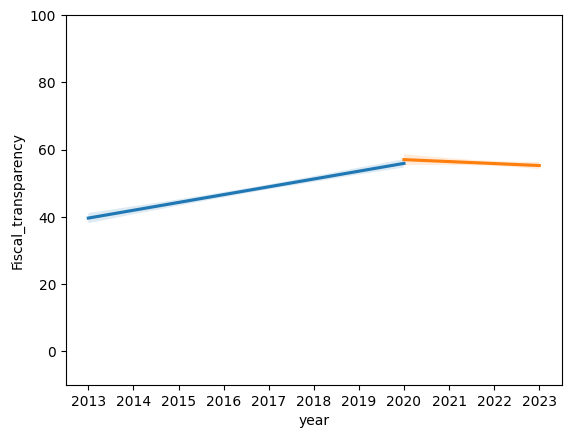

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import pandas as pd 
from matplotlib.pyplot import MultipleLocator

data_w=pd.read_excel("C:\\Users\\王浩晨\\Desktop\\General.xlsx","Sheet1")
data_h=data_w[['province','Fiscal_transparency','city','year']]
before=data_c[data_c['year']<=2020]
after=data_c[data_c['year']>=2020]

sns.regplot(x='year',y='Fiscal_transparency',data=before,scatter=False)
sns.regplot(x='year',y='Fiscal_transparency',data=after,scatter=False)
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(20)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.ylim(-10,100)
plt.show()

显而易见的是，2020年形成了一个断点。我们初步猜测，这个断点的产生和新冠疫情有关，后续会继续深入分析其原因。
有了这个断点，我们就可以据此将样本根据2020年进行划分，分部分进行回归分析。

In [31]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col

data_w=pd.read_excel("C:\\Users\\王浩晨\\Desktop\\数据11.8.xlsx","Sheet1")
data_h=data_w[['province','Fiscal_transparency','industry_structrue','Regional_GDP_log','perGDP_log','Fiscal_autonomy','population_log','city','year','past_experience','male','age','education']]
data_h=data_h.set_index(['city','province','year'],drop=False)
data_c=pd.DataFrame(data_h)

before=data_c[data_c['year']<=2020]

after=data_c[data_c['year']>=2020]

regression=smf.ols(formula='Fiscal_transparency~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=before)
result_reg1=regression.fit()

regression=smf.ols(formula='Fiscal_transparency~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=after)
result_reg2=regression.fit()

result=summary_col([result_reg1,result_reg2],
            model_names=['model1','model2'],                                       
            stars=True,regressor_order=['const','past_experience','male','age','education','industry_structrue','Fiscal_autonomy','population_log','perGDP_log'],
            drop_omitted=True,info_dict={'':lambda x:'',
                                         '':lambda x:'',
                                         'Observations':lambda x:str(int(x.nobs)),
                                         })

print(result)


                      model1     model2  
-----------------------------------------
past_experience    0.0521**    0.1031*** 
                   (0.0232)    (0.0259)  
male               -1.3145     2.3774    
                   (1.8569)    (1.6466)  
age                0.1597      0.1272    
                   (0.1380)    (0.1302)  
education          -0.3945     0.8639    
                   (1.3764)    (1.4735)  
industry_structrue -15.9702    0.2733    
                   (11.0035)   (0.2130)  
Fiscal_autonomy    11.1674     16.9934*  
                   (7.2594)    (9.4701)  
population_log     -53.2733*** 32.0946   
                   (18.7236)   (62.8946) 
perGDP_log         7.2176      74.7621***
                   (7.5690)    (18.2317) 
R-squared          0.5576      0.7876    
R-squared Adj.     0.4740      0.6717    
                                         
Observations       1856        803       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


这样产生了非常神奇的结论：2020年两侧的回归模型的核心解释变量分别在5%和1%的显著性水平上显著，并且系数值较之总体大了不少。

下一步，我们将市长由财政透明度高的地级市调到财政透明度低的地级市的情况和由财政透明度低的地级市调到财政透明度高的地级市的情况分开进行讨论，也就是将past_experience的值按大于0，小于0分别进行回归。

In [32]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col

data_w=pd.read_excel("C:\\Users\\王浩晨\\Desktop\\数据11.8.xlsx","Sheet1")
data_h=data_w[['province','Fiscal_transparency','industry_structrue','Regional_GDP_log','perGDP_log','Fiscal_autonomy','population_log','city','year','past_experience','male','age','education']]
data_h=data_h.set_index(['city','province','year'],drop=False)
data_c=pd.DataFrame(data_h)

data_c_pos=data_c[data_c['past_experience']>=0]
data_c_neg=data_c[data_c['past_experience']<=0]

before=data_c[data_c['year']<=2020]
before_neg=before[before['past_experience']<=0]
before_pos=before[before['past_experience']>=0]

after=data_c[data_c['year']>=2020]
after_neg=after[after['past_experience']<=0]
after_pos=after[after['past_experience']>=0]

regression=smf.ols(formula='Fiscal_transparency~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=before_neg)
result_reg1=regression.fit()

regression=smf.ols(formula='Fiscal_transparency~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=before_pos)
result_reg2=regression.fit()

regression=smf.ols(formula='Fiscal_transparency~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=after_neg)
result_reg3=regression.fit()

regression=smf.ols(formula='Fiscal_transparency~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=after_pos)
result_reg4=regression.fit()

regression=smf.ols(formula='Fiscal_transparency~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=data_c_neg)
result_reg5=regression.fit()

regression=smf.ols(formula='Fiscal_transparency~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=data_c_pos)
result_reg6=regression.fit()

result=summary_col([result_reg1,result_reg2,result_reg3,result_reg4,result_reg5,result_reg6],
            model_names=['model1','model2','model3','model4','model5','model6'],                                       
            stars=True,regressor_order=['const','past_experience','male','age','education','industry_structrue','Fiscal_autonomy','population_log','perGDP_log'],
            drop_omitted=True,info_dict={'':lambda x:'',
                                         '':lambda x:'',
                                         'Observations':lambda x:str(int(x.nobs)),
                                         })

print(result)


                     model1    model2     model3     model4     model5    model6  
----------------------------------------------------------------------------------
past_experience    0.0852    0.0711     0.0581    0.0397      0.0240    0.0343    
                   (0.0639)  (0.0510)   (0.0497)  (0.0625)    (0.0446)  (0.0381)  
male               -1.0659   -2.0139    5.3157*   5.3213*     1.6246    -0.5348   
                   (3.5710)  (2.9361)   (2.7536)  (2.9441)    (2.2903)  (2.0132)  
age                0.0079    0.2765     0.2641    -0.0399     -0.0817   0.2681    
                   (0.2253)  (0.2291)   (0.1797)  (0.2716)    (0.1543)  (0.1658)  
education          1.0609    1.2226     3.9788*   -1.4330     2.2770    0.5660    
                   (2.5217)  (2.2534)   (2.0820)  (3.1936)    (1.7613)  (1.6942)  
industry_structrue 35.8255*  -42.0585** 0.3148*   -64.1167    0.0952    -29.2128**
                   (18.9664) (16.2993)  (0.1696)  (48.5207)   (0.2859)  (11.7453) 
Fis

结果并不显著，但能够看出市长由财政透明度低的地级市调到财政透明度高的地级市时对财政透明度的拉低程度是大于由财政透明度高的地级市调到财政透明度低的地级市时对财政透明度的拉高程度的。

下来我们将past_experience转化为dummy(大于零时取1，否则取0)，进行回归。

In [74]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col

data_w=pd.read_excel("C:\\Users\\王浩晨\\Desktop\\数据2.xlsx")
data_h=data_w[['province','Fiscal_transparency','industry_structure','Regional_GDP_log','perGDP_log','Fiscal_autonomy','population_log','city','year','past_experience','male','age','education']]
data_h=data_h.set_index(['city','province','year'],drop=False)
data_c=pd.DataFrame(data_h)

past_pos=data_c[data_c['past_experience']>1]
past_experience_dummy=[1 for index in range(len(past_pos))]
past_pos['past_experience_dummy']=past_experience_dummy

past_neg=data_c[data_c['past_experience']<1]
past_experience_dummy=[0 for index in range(len(past_neg))]
past_neg['past_experience_dummy']=past_experience_dummy

data_pas=pd.concat([past_pos,past_neg],ignore_index=True)

before=data_pas[data_pas['year']<=2020]

after=data_pas[data_pas['year']>=2020]

regression=smf.ols(formula='Fiscal_transparency~past_experience_dummy+male+age+education+industry_structure+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=data_pas)
result_reg1=regression.fit()


result=summary_col([result_reg1],
            model_names=['model1'],                                       
            stars=True,regressor_order=['const','past_experience_dummy','male','age','education','industry_structure','Fiscal_autonomy','population_log','perGDP_log'],
            drop_omitted=True,info_dict={'':lambda x:'',
                                         '':lambda x:'',
                                         'Observations':lambda x:str(int(x.nobs)),
                                         })

print(result)

C:\Users\王浩晨\AppData\Local\Temp\ipykernel_7668\2878889024.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_pos['past_experience_dummy']=past_experience_dummy
C:\Users\王浩晨\AppData\Local\Temp\ipykernel_7668\2878889024.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_neg['past_experience_dummy']=past_experience_dummy



                         model1  
---------------------------------
past_experience_dummy -0.9922    
                      (0.6990)   
male                  -0.3532    
                      (1.3281)   
age                   0.1289     
                      (0.1061)   
education             -0.0076    
                      (1.0582)   
industry_structure    -0.0044    
                      (0.2896)   
Fiscal_autonomy       8.3982     
                      (5.6474)   
population_log        -51.1110***
                      (14.1498)  
perGDP_log            1.1392     
                      (5.4223)   
R-squared             0.5549     
R-squared Adj.        0.4895     
                                 
Observations          2304       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


由此可以看出，past_experience大于零的组通过过去经验对财政透明度的提高程度要大于小于等于零的组，并且这个现象在断点年份之后尤其显著。（经济学与统计学双重意义上）

In [34]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col

data_w=pd.read_excel("C:\\Users\\王浩晨\\Desktop\\数据11.8.xlsx","Sheet1")
data_h=data_w[['word_time_dummy','word_time','word_time_general_log','province','Fiscal_transparency','industry_structrue','Regional_GDP_log','perGDP_log','Fiscal_autonomy','population_log','city','year','past_experience','male','age','education']]
data_h=data_h.set_index(['city','province','year'],drop=False)
data_c=pd.DataFrame(data_h)

before=data_c[data_c['year']<=2020]

after=data_c[data_c['year']>=2020]

regression1=smf.ols(formula='Fiscal_transparency~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=before)
result1=regression1.fit()
result1.summary()

regression2=smf.ols(formula='Fiscal_transparency~past_experience+word_time_dummy+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=before)
result2=regression2.fit()
result2.summary()

regression3=smf.logit(formula='word_time_dummy~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(province)',data=before)
result3=regression3.fit()
result3.summary()

regression4=smf.ols(formula='Fiscal_transparency~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=after)
result4=regression4.fit()
result4.summary()

regression5=smf.ols(formula='Fiscal_transparency~past_experience+word_time_dummy+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=after)
result5=regression5.fit()
result5.summary()

regression6=smf.logit(formula='word_time_dummy~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(province)',data=after)
result6=regression6.fit()
result6.summary()

regression7=smf.ols(formula='Fiscal_transparency~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=data_c)
result7=regression7.fit()
result7.summary()

regression8=smf.ols(formula='Fiscal_transparency~past_experience+word_time_dummy+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=data_c)
result8=regression8.fit()
result8.summary()

regression9=smf.logit(formula='word_time_dummy~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(province)',data=data_c)
result9=regression9.fit()
result9.summary()

result=summary_col([result1,result2,result3,result4,result5,result6,result7,result8,result9],
            model_names=['model1','model2','model3','model4','model5','model6','model7','model8','model9'],                                       
            stars=True,regressor_order=['const','past_experience','word_time','word_time_dummy','male','age','education','industry_structrue','Fiscal_autonomy','population_log','perGDP_log'],
            drop_omitted=True,info_dict={'':lambda x:'',
                                         '':lambda x:'',
                                         'Observations':lambda x:str(int(x.nobs)),
                                         })

print(result)

         Current function value: 0.529780
         Iterations: 35


c:\Users\王浩晨\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.358654
         Iterations: 35


c:\Users\王浩晨\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.487647
         Iterations 8

                      model1      model2    model3    model4     model5     model6     model7      model8    model9 
--------------------------------------------------------------------------------------------------------------------
past_experience    0.0521**    0.0520**    0.0036   0.1031***  0.1018***  0.0012    0.0094      0.0099      0.0019  
                   (0.0232)    (0.0232)    (0.0029) (0.0259)   (0.0259)   (0.0060)  (0.0178)    (0.0178)    (0.0027)
word_time_dummy                1.6244*                         -1.3490                          1.0741              
                               (0.8564)                        (1.0850)                         (0.7144)            
male               -1.3145     -1.4032     0.1905   2.3774     2.3534     0.3362    0.0046      -0.0197     0.0965  
                   (1.8569)    (1.8560)    (0.2442) (1.6466)   (1.6458)   (0.4

中介效应在2020年及以前表现良好，并且可以看出主要是通过过去经验直接影响财政透明度，通过地级市政府工作报告的透明词频的间接效用程度不大。

接下来我们来关注市长的晋升激励————一方面通过省级政府工作报告的透明词频，体现上级领导的关注导向；另一方面通过以2018年为节点，因为中央在2018年之后对地级市领导的考核由唯GDP论转变成考察环保、预算公开等多维度考核。

首先是省级领导的关注。

In [35]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col

data_w=pd.read_excel("C:\\Users\\王浩晨\\Desktop\\数据11.8.xlsx","Sheet1")
data_h=data_w[['word_time_province','province','Fiscal_transparency','industry_structrue','Regional_GDP_log','perGDP_log','Fiscal_autonomy','population_log','city','year','past_experience','male','age','education']]
data_h=data_h.set_index(['city','province','year'],drop=False)
data_c=pd.DataFrame(data_h)

col_name=data_c.columns.tolist()
index=col_name.index('education')+1
past_experience_word_time_province=data_c['past_experience']*data_c['word_time_province']
data_c.insert(index,'past_experience_word_time_province',past_experience_word_time_province)

before=data_c[data_c['year']<=2020]

after=data_c[data_c['year']>=2020]

regression1=smf.ols(formula='Fiscal_transparency~past_experience+word_time_province+past_experience_word_time_province+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=before)
result1=regression1.fit()
result1.summary()

regression2=smf.ols(formula='Fiscal_transparency~past_experience+word_time_province+past_experience_word_time_province+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=after)
result2=regression2.fit()
result2.summary()

regression3=smf.ols(formula='Fiscal_transparency~past_experience+word_time_province+past_experience_word_time_province+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=data_c)
result3=regression3.fit()
result3.summary()

result=summary_col([result1,result2,result3],
            model_names=['model1','model2','model3'],                                       
            stars=True,regressor_order=['const','past_experience','word_time_province','past_experience_word_time_province','male','age','education','industry_structrue','Fiscal_autonomy','population_log','perGDP_log'],
            drop_omitted=True,info_dict={'':lambda x:'',
                                         '':lambda x:'',
                                         'Observations':lambda x:str(int(x.nobs)),
                                         })

print(result)


                                      model1     model2      model3  
---------------------------------------------------------------------
past_experience                    0.0991***   0.1484***  0.0370     
                                   (0.0310)    (0.0313)   (0.0232)   
word_time_province                 1.8882***   1.7824**   1.5084***  
                                   (0.5703)    (0.7258)   (0.4599)   
past_experience_word_time_province -0.0542**   -0.0710**  -0.0352*   
                                   (0.0249)    (0.0312)   (0.0203)   
male                               -1.3084     2.4416     -0.0142    
                                   (1.8524)    (1.6337)   (1.3100)   
age                                0.1699      0.1262     0.1196     
                                   (0.1376)    (0.1291)   (0.1022)   
education                          -0.4284     0.7226     -0.2334    
                                   (1.3734)    (1.4706)   (1.0294)   
industry_structrue 

这个结果说明省级领导对财政透明的关注与地级市的财政透明度是正向相关且显著的，但是，随着省级领导对财政透明的关注提高，过去经历对财政透明度的提高是在下降的。这个原因还在具体探究。

下一步我们将past_experience的正负与省级领导的关注结合起来考虑。

In [47]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col

data_w=pd.read_excel("C:\\Users\\王浩晨\\Desktop\\数据2.xlsx")
data_h=data_w[['past_experience_budget','Fiscal_transparency_log_lagged','past_experience_budget_delta','Fiscal_transparency_lagged','strict_wide','strict','past_experience_pos','strict_d_lagged','past_experience_delta','past_experience_neg','strict_d','word_time_province','strict_wide_d_lagged','Fiscal_transparency','word_time_province_lagged','province','Fiscal_transparency_log','industry_structure','Regional_GDP_log','perGDP_log','Fiscal_autonomy','population_log','city','year','past_experience','male','age','education']]
data_h=data_h.set_index(['city','year'],drop=False)
data_c=pd.DataFrame(data_h)

col_name=data_c.columns.tolist()
index=col_name.index('education')+1
past_experience_word_time_province=data_c['past_experience_budget_delta']*data_c['strict_wide_d_lagged']
data_c.insert(index,'past_experience_word_time_province',past_experience_word_time_province)

regression=smf.ols(formula='Fiscal_transparency_lagged~past_experience_delta+strict_wide_d_lagged+past_experience_word_time_province+male+age+education+industry_structure+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)',data=data_c)
result_reg1=regression.fit()

result=summary_col([result_reg1],
            model_names=['model1'],                                       
            stars=True,regressor_order=['const','past_experience_neg','word_time_province','past_experience_word_time_province','male','age','education','industry_structure','Fiscal_autonomy','population_log','perGDP_log'],
            drop_omitted=True,info_dict={'':lambda x:'',
                                         '':lambda x:'',
                                         'Observations':lambda x:str(int(x.nobs)),
                                         })

print(result)


                                      model1  
----------------------------------------------
past_experience_word_time_province -0.0036    
                                   (0.0119)   
male                               0.2179     
                                   (1.2532)   
age                                0.1619     
                                   (0.0992)   
education                          0.9015     
                                   (0.9962)   
industry_structure                 0.0380     
                                   (0.2731)   
Fiscal_autonomy                    7.9033     
                                   (5.3018)   
population_log                     -43.5052***
                                   (13.3343)  
perGDP_log                         1.2919     
                                   (5.0812)   
R-squared                          0.5395     
R-squared Adj.                     0.4721     
                                              
Observations

效果并不好。

接下来讨论区分2018年前后的情况。

In [37]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col

data_w=pd.read_excel("C:\\Users\\王浩晨\\Desktop\\数据11.8.xlsx","Sheet1")
data_h=data_w[['province','Fiscal_transparency','industry_structrue','Regional_GDP_log','perGDP_log','Fiscal_autonomy','population_log','city','year','past_experience','male','age','education']]
data_h=data_h.set_index(['city','province','year'],drop=False)
data_c=pd.DataFrame(data_h)

year_dummy1=data_c[data_c['year']>=2018]
year_dummy=[0 for index in range(len(year_dummy1))]
year_dummy1['year_dummy']=year_dummy

year_dummy2=data_c[data_c['year']<2018]
year_dummy=[1 for index in range(len(year_dummy2))]
year_dummy2['year_dummy']=year_dummy

data_c=pd.concat([year_dummy1,year_dummy2],ignore_index=True)

year_dummy1_side=data_c[data_c['year']>=2018]
year_dummy_side=[1 for index in range(len(year_dummy1_side))]
year_dummy1_side['year_dummy_side']=year_dummy_side

year_dummy2_side=data_c[data_c['year']<2018]
year_dummy_side=[0 for index in range(len(year_dummy2_side))]
year_dummy2_side['year_dummy_side']=year_dummy_side

data_c=pd.concat([year_dummy1_side,year_dummy2_side],ignore_index=True)

col_name=data_c.columns.tolist()
index=col_name.index('education')+1
past_experience_year_before=data_c['year_dummy']*data_c['past_experience']
data_c.insert(index,'past_experience_year_before',past_experience_year_before)

col_name=data_c.columns.tolist()
index=col_name.index('education')+1
past_experience_year_dummy_after=data_c['year_dummy_side']*data_c['past_experience']
data_c.insert(index,'past_experience_year_after',past_experience_year_dummy_after)

regression=smf.ols(formula='Fiscal_transparency~past_experience_year_before+past_experience_year_after+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=data_c)
result_reg1=regression.fit()

result=summary_col([result_reg1],
            model_names=['model1'],                                       
            stars=True,regressor_order=['const','past_experience_year_before','past_experience_year_after','male','age','education','industry_structrue','Fiscal_autonomy','population_log','perGDP_log'],
            drop_omitted=True,info_dict={'':lambda x:'',
                                         '':lambda x:'',
                                         'Observations':lambda x:str(int(x.nobs)),
                                         })

print(result)

C:\Users\王浩晨\AppData\Local\Temp\ipykernel_12772\2686485723.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_dummy1['year_dummy']=year_dummy
C:\Users\王浩晨\AppData\Local\Temp\ipykernel_12772\2686485723.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_dummy2['year_dummy']=year_dummy
C:\Users\王浩晨\AppData\Local\Temp\ipykernel_12772\2686485723.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



                               model1  
---------------------------------------
past_experience_year_before -0.0299    
                            (0.0244)   
past_experience_year_after  0.0395*    
                            (0.0220)   
male                        0.0304     
                            (1.3117)   
age                         0.1119     
                            (0.1023)   
education                   -0.1456    
                            (1.0286)   
industry_structrue          0.0053     
                            (0.2887)   
Fiscal_autonomy             10.3148*   
                            (5.4944)   
population_log              -50.6757***
                            (14.0641)  
perGDP_log                  2.6244     
                            (5.2316)   
R-squared                   0.5603     
R-squared Adj.              0.4977     
                                       
Observations                2395       
Standard errors in parentheses.
* p<.1,

结果与预期一致，在2018年之后正向且显著，对比2018之前负向且不显著。

下一步，我们讨论市长的晋升压力————我们主要考虑两个方面，年龄和任期。

首先是年龄。

In [38]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col

def age_data(n):
    data_w=pd.read_excel("C:\\Users\\王浩晨\\Desktop\\数据11.8.xlsx","Sheet1")
    data_h=data_w[['province','Fiscal_transparency','industry_structrue','Regional_GDP_log','perGDP_log','Fiscal_autonomy','population_log','city','year','past_experience','male','age','education']]
    data_h=data_h.set_index(['city','province','year'],drop=False)
    data_c=pd.DataFrame(data_h)

    age_dummy1=data_c[data_c['age']>=n]
    age_dummy=[0 for index in range(len(age_dummy1))]
    age_dummy1['age_dummy']=age_dummy

    age_dummy2=data_c[data_c['age']<n]
    age_dummy=[1 for index in range(len(age_dummy2))]
    age_dummy2['age_dummy']=age_dummy

    data_c=pd.concat([age_dummy1,age_dummy2],ignore_index=True)

    age_dummy1_side=data_c[data_c['age']>=n]
    age_dummy_side=[1 for index in range(len(age_dummy1_side))]
    age_dummy1_side['age_dummy_side']=age_dummy_side

    age_dummy2_side=data_c[data_c['age']<n]
    age_dummy_side=[0 for index in range(len(age_dummy2_side))]
    age_dummy2_side['age_dummy_side']=age_dummy_side

    data_c=pd.concat([age_dummy1_side,age_dummy2_side],ignore_index=True)

    col_name=data_c.columns.tolist()
    index=col_name.index('education')+1
    past_experience_age_before=data_c['age_dummy']*data_c['past_experience']
    data_c.insert(index,'past_experience_age_before',past_experience_age_before)

    col_name=data_c.columns.tolist()
    index=col_name.index('education')+1
    past_experience_age_after=data_c['age_dummy_side']*data_c['past_experience']
    data_c.insert(index,'past_experience_age_after',past_experience_age_after)
    
    before=data_c[data_c['year']<=2020]

    after=data_c[data_c['year']>=2020]

    regression=smf.ols(formula='Fiscal_transparency~past_experience_age_before+past_experience_age_after+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=before)
    result_reg1=regression.fit()
    
    regression=smf.ols(formula='Fiscal_transparency~past_experience_age_before+past_experience_age_after+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=after)
    result_reg2=regression.fit()
    
    regression=smf.ols(formula='Fiscal_transparency~past_experience_age_before+past_experience_age_after+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=data_c)
    result_reg3=regression.fit()
    
    result=summary_col([result_reg1,result_reg2,result_reg3],
            model_names=['model1','model2','model3'],                                       
            stars=True,regressor_order=['const','past_experience_age_before','past_experience_age_after','male','age','education','industry_structrue','Fiscal_autonomy','population_log','perGDP_log'],
            drop_omitted=True,info_dict={'':lambda x:'',
                                         '':lambda x:'',
                                         'Observations':lambda x:str(int(x.nobs)),
                                         })

    print(result)

age_data(52)

C:\Users\王浩晨\AppData\Local\Temp\ipykernel_12772\3061501883.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_dummy1['age_dummy']=age_dummy
C:\Users\王浩晨\AppData\Local\Temp\ipykernel_12772\3061501883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_dummy2['age_dummy']=age_dummy
C:\Users\王浩晨\AppData\Local\Temp\ipykernel_12772\3061501883.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t


                              model1     model2      model3  
-------------------------------------------------------------
past_experience_age_before 0.0903***   0.1553***  0.0348     
                           (0.0337)    (0.0392)   (0.0258)   
past_experience_age_after  0.0263      0.0732**   -0.0088    
                           (0.0285)    (0.0309)   (0.0223)   
male                       -0.9789     2.9336*    0.2561     
                           (1.8684)    (1.6727)   (1.3257)   
age                        0.1794      0.1339     0.1200     
                           (0.1385)    (0.1299)   (0.1026)   
education                  -0.4077     0.9331     -0.0866    
                           (1.3758)    (1.4710)   (1.0291)   
industry_structrue         -15.0851    0.2721     -0.0007    
                           (11.0129)   (0.2126)   (0.2890)   
Fiscal_autonomy            11.1817     17.8122*   10.5113*   
                           (7.2560)    (9.4617)   (5.4982)   
populat

如我们所见，

In [39]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col

def tenure_data(n):
    data_w=pd.read_excel("C:\\Users\\王浩晨\\Desktop\\数据11.8.xlsx","Sheet1")
    data_h=data_w[['province','tenure','Fiscal_transparency','industry_structrue','Regional_GDP_log','perGDP_log','Fiscal_autonomy','population_log','city','year','past_experience','male','age','education']]
    data_h=data_h.set_index(['city','province','year'],drop=False)
    data_c=pd.DataFrame(data_h)

    tenure_dummy1=data_c[data_c['tenure']>=n]
    tenure_dummy=[0 for index in range(len(tenure_dummy1))]
    tenure_dummy1['tenure_dummy']=tenure_dummy

    tenure_dummy2=data_c[data_c['tenure']<n]
    tenure_dummy=[1 for index in range(len(tenure_dummy2))]
    tenure_dummy2['tenure_dummy']=tenure_dummy

    data_c=pd.concat([tenure_dummy1,tenure_dummy2],ignore_index=True)

    tenure_dummy1_side=data_c[data_c['tenure']>=n]
    tenure_dummy_side=[1 for index in range(len(tenure_dummy1_side))]
    tenure_dummy1_side['tenure_dummy_side']=tenure_dummy_side

    tenure_dummy2_side=data_c[data_c['tenure']<n]
    tenure_dummy_side=[0 for index in range(len(tenure_dummy2_side))]
    tenure_dummy2_side['tenure_dummy_side']=tenure_dummy_side

    data_c=pd.concat([tenure_dummy1_side,tenure_dummy2_side],ignore_index=True)

    col_name=data_c.columns.tolist()
    index=col_name.index('education')+1
    past_experience_tenure_before=data_c['tenure_dummy']*data_c['past_experience']
    data_c.insert(index,'past_experience_tenure_before',past_experience_tenure_before)

    col_name=data_c.columns.tolist()
    index=col_name.index('education')+1
    past_experience_tenure_after=data_c['tenure_dummy_side']*data_c['past_experience']
    data_c.insert(index,'past_experience_tenure_after',past_experience_tenure_after)
    
    before=data_c[data_c['year']<2018]

    after=data_c[data_c['year']>=2018]

    regression=smf.ols(formula='Fiscal_transparency~past_experience_tenure_before+past_experience_tenure_after+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=before)
    result_reg1=regression.fit()
    
    regression=smf.ols(formula='Fiscal_transparency~past_experience_tenure_before+past_experience_tenure_after+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=after)
    result_reg2=regression.fit()
    
    regression=smf.ols(formula='Fiscal_transparency~past_experience_tenure_before+past_experience_tenure_after+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=data_c)
    result_reg3=regression.fit()
    
    result=summary_col([result_reg1,result_reg2,result_reg3],
            model_names=['model1','model2','model3'],                                       
            stars=True,regressor_order=['const','past_experience_tenure_before','past_experience_tenure_after','male','age','education','industry_structrue','Fiscal_autonomy','population_log','perGDP_log'],
            drop_omitted=True,info_dict={'':lambda x:'',
                                         '':lambda x:'',
                                         'Observations':lambda x:str(int(x.nobs)),
                                         })

    print(result)

tenure_data(3)
tenure_data(6)

C:\Users\王浩晨\AppData\Local\Temp\ipykernel_12772\3675919582.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenure_dummy1['tenure_dummy']=tenure_dummy
C:\Users\王浩晨\AppData\Local\Temp\ipykernel_12772\3675919582.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenure_dummy2['tenure_dummy']=tenure_dummy
C:\Users\王浩晨\AppData\Local\Temp\ipykernel_12772\3675919582.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va


                                model1     model2     model3  
--------------------------------------------------------------
past_experience_tenure_before 0.0553     0.0551**  -0.0106    
                              (0.0402)   (0.0272)  (0.0203)   
past_experience_tenure_after  0.0151     0.0447    0.0484*    
                              (0.0584)   (0.0334)  (0.0260)   
male                          -2.6692    -0.2279   0.0162     
                              (3.2114)   (1.6300)  (1.3120)   
age                           0.0666     0.0933    0.1086     
                              (0.2291)   (0.1294)  (0.1023)   
education                     -1.8127    0.1754    -0.0129    
                              (2.1613)   (1.4301)  (1.0291)   
industry_structrue            33.6625    0.0492    0.0004     
                              (27.9231)  (0.2594)  (0.2888)   
Fiscal_autonomy               14.6923    0.1732    10.9532**  
                              (11.1392)  (9.1992)  (5.

C:\Users\王浩晨\AppData\Local\Temp\ipykernel_12772\3675919582.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenure_dummy1['tenure_dummy']=tenure_dummy
C:\Users\王浩晨\AppData\Local\Temp\ipykernel_12772\3675919582.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenure_dummy2['tenure_dummy']=tenure_dummy
C:\Users\王浩晨\AppData\Local\Temp\ipykernel_12772\3675919582.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va


                                model1     model2     model3  
--------------------------------------------------------------
past_experience_tenure_before 0.0444     0.0505**  0.0070     
                              (0.0375)   (0.0242)  (0.0179)   
past_experience_tenure_after  0.2413     0.0840    0.1640*    
                              (0.1940)   (0.1044)  (0.0928)   
male                          -2.5304    -0.2588   -0.0039    
                              (3.2031)   (1.6295)  (1.3124)   
age                           0.0616     0.0936    0.1083     
                              (0.2291)   (0.1294)  (0.1023)   
education                     -1.6734    0.1425    -0.1194    
                              (2.1487)   (1.4327)  (1.0291)   
industry_structrue            32.9305    0.0467    -0.0014    
                              (27.9174)  (0.2594)  (0.2889)   
Fiscal_autonomy               14.7588    0.2595    10.5288*   
                              (11.1352)  (9.2027)  (5.

关于任期的结果，以3年和6年为分界的结果表现是较为良好的：首先，从总体样本上看，这个结果说明在任期达到3年（6年）之后，出于晋升压力的原因，市长更有激励通过自身过去的经历去提高任职所在地的财政透明度；其次，以2018年为分界点（中央导向改变之后），我们有一个很有意思的发现，市长在任期未到3年（6年）的时候，也是很有意愿做这个事情的，并且，当我不断改变任期的节点，这个系数是一直在显著的，换句话来说，当中央政府的导向改变之后，即使市长未感受到来自任期的晋升压力，其也是有意愿去通过自身过去的经历去提高任职所在地的财政透明度的。

下一步，我们关注市长的来源问题，并据此做进一步分析。我们采用双重差分的思路，将来源是省级部门和中央部门的市长的past experience取为0，那么这时候实验组就是横向交流的市长。

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col

data_w=pd.read_excel("C:\\Users\\王浩晨\\Desktop\\数据11.8.xlsx","Sheet1")
data_h=data_w[['From','province','Fiscal_transparency','industry_structrue','Regional_GDP_log','perGDP_log','Fiscal_autonomy','population_log','city','year','past_experience','male','age','education']]
data_h=data_h.set_index(['city','province','year'],drop=False)
data_c=pd.DataFrame(data_h)

data_c.loc[data_c['From']<2,'past_experience']=0

before=data_c[data_c['year']<=2020]

after=data_c[data_c['year']>=2020]

regression1=smf.ols(formula='Fiscal_transparency~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=before)
result_reg1=regression1.fit()


regression2=smf.ols(formula='Fiscal_transparency~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=after)
result_reg2=regression2.fit()


regression3=smf.ols(formula='Fiscal_transparency~past_experience+male+age+education+industry_structrue+Fiscal_autonomy+population_log+perGDP_log+C(year)+C(city)+C(province)',data=data_c)
result_reg3=regression3.fit()

result=summary_col([result_reg1,result_reg2,result_reg3],
            model_names=['model1','model2','model3'],                                       
            stars=True,regressor_order=['const','past_experience','male','age','education','industry_structrue','Fiscal_autonomy','population_log','perGDP_log'],
            drop_omitted=True,info_dict={'':lambda x:'',
                                         '':lambda x:'',
                                         'Observations':lambda x:str(int(x.nobs)),
                                         })

print(result)


                      model1     model2      model3  
-----------------------------------------------------
past_experience    0.0617**    0.0801***  0.0134     
                   (0.0268)    (0.0253)   (0.0189)   
male               -0.6499     2.5796     0.6107     
                   (2.0765)    (1.6721)   (1.3810)   
age                0.2549*     0.1352     0.1944*    
                   (0.1536)    (0.1310)   (0.1080)   
education          1.0672      1.1548     0.9440     
                   (1.5316)    (1.4790)   (1.0932)   
industry_structrue -27.7714**  0.1973     -0.0251    
                   (11.6945)   (0.2153)   (0.2837)   
Fiscal_autonomy    6.5863      18.4223*   6.9149     
                   (8.2656)    (9.5236)   (5.9639)   
population_log     -64.0105*** 39.5150    -54.1005***
                   (22.9236)   (63.1988)  (16.4455)  
perGDP_log         20.0628**   77.4289*** 9.5086*    
                   (8.3325)    (18.3167)  (5.7274)   
R-squared          0.5589  

由此来看，在2020年及以后，实验组的效果良好，也就是说，由平级调动的市长通过过去经验对所在任职地的财政透明度的提高效果更好。

这就是目前我们所有的结果。总体来看，结果是比较好的，但有几个地方还尚存问题。

首先，关于为什么总体样本不显著，而以2020年为节点之后就开始分别显著，这个原因还值得我们去探讨。

其次，就是这个断点为什么是2020年，初步推断是因为疫情的原因，有没有办法去剖析这个断点出现的原因。

再者，就是我们可以看到目前回归效果不好的点主要在结合省级领导的关注方向，也就是我们的省级工作报告的关注词频，或者换种方式去衡量其关注导向？

最后，在看论文的时候注意到一点：“我们认为相对于其他市级领导市委书记是更合适的考察对象，因为：（正如上面所言，市级领导干部的主要工作是管理当地经济社会事务；（几乎所有涉及当地社会经济发展的重大决策都须先经书记办公会和常委会讨论并形成决议，而后才由市长签发执行（市委书记大多由市长升任或熟悉经济工作的官员调任，②而在晋升为该市一把手之后通常都有实施自己发展当地经济构想的强烈欲望。总之，地方政府的经济政策及其效果在很大程度上是书记意志的表象”。我们有没有必要拿市委书记再做一遍，因为其实我们现在拿市长做处理样本的结果其实大部分是很良好的。